# **Estadística Financiera con Python**

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

# Paquetes

In [54]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Importación de datos financieros con Yahoo Finance usando Python

Para realizar análisis financieros, uno de los pasos iniciales es obtener datos históricos de activos. Yahoo Finance es una fuente popular que ofrece información como precios de apertura, cierre, máximos, mínimos, volumen y precios ajustados.

Con la biblioteca `yfinance`, es posible descargar estos datos fácilmente. Por ejemplo, el siguiente código obtiene datos históricos de Apple (AAPL) entre el 1 de enero de 2020 y el 1 de enero de 2024:

In [2]:
data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.796005,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.320984,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.484337,75.797501,76.110001,74.290001,74.290001,132079200


Este comando genera un DataFrame con columnas como:
- **Open**: Precio de apertura.
- **High**: Precio máximo.
- **Low**: Precio mínimo.
- **Close**: Precio de cierre.
- **Adj Close**: Precio ajustado.
- **Volume**: Número de acciones negociadas.

In [3]:
print(data.columns)

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


La actual version nos da columnas en dos dimenciones para solucionar esto:

In [4]:
data.columns.droplevel(1)

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

Ahora reemplazamos los nombres de columnas por textos individuales

In [5]:
data.columns = data.columns.droplevel(1)
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,72.796005,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.320984,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.484337,75.797501,76.110001,74.290001,74.290001,132079200


## Ejercicio 1

Importa datos históricos de Tesla (TSLA) con frecuencia diaria desde el 1 de enero de 2022 hasta el 1 de enero de 2024. Llame al dataset tesla.

In [6]:
tesla = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
tesla.columns = tesla.columns.droplevel(1)  # Ajustar MultiIndex
tesla.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2022-01-03,399.926666,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,342.320007,360.309998,336.666656,360.123322,84164700


## Ejercicio 2

Descarga datos semanales de dos empresas del sector tecnología: Microsoft (MSFT) y Apple (AAPL), desde el 1 de enero de 2020 hasta el 1 de enero de 2024. Agrupa los datos en un DataFrame llamado tecnologia.

In [18]:
tecnologia = yf.download(["MSFT", "AAPL"], start="2020-01-01", end="2024-01-01")
tecnologia = tecnologia['Adj Close']  # Ajustar MultiIndex
tecnologia.head()

[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,MSFT
Date,,
2020-01-02,72.796005,153.630707
2020-01-03,72.088287,151.717743
2020-01-06,72.662720,152.109894
2020-01-07,72.320984,150.722977
2020-01-08,73.484337,153.123749


## Ejercicio 3

Importa datos mensuales de un portafolio multisectorial compuesto por las siguientes empresas desde el 1 de enero de 2018 hasta el 1 de enero de 2024:

- Exxon Mobil (XOM) - Energía
- Coca-Cola (KO) - Consumo básico
- Alphabet (GOOGL) - Tecnología

Nombra el DataFrame resultante portafolio_1.

In [17]:
portafolio_1 = yf.download(["XOM", "KO", "GOOGL"], start="2018-01-01", end="2024-01-01")
portafolio_1 = portafolio_1['Adj Close']  # Ajustar MultiIndex
portafolio_1.head()

[*********************100%***********************]  3 of 3 completed


Ticker,GOOGL,KO,XOM
Date,,,
2018-01-02,53.466679,36.539890,61.135204
2018-01-03,54.378876,36.459652,62.335896
2018-01-04,54.590103,36.973171,62.422184
2018-01-05,55.313980,36.965134,62.371841
2018-01-08,55.509274,36.908974,62.652252


## Ejercicio 4

Obtén datos diarios del índice Nasdaq (^IXIC) entre el 1 de enero de 2019 y el 1 de enero de 2024. Llama al DataFrame nasdaq.

In [9]:
nasdaq = yf.download("^IXIC", start="2019-01-01", end="2024-01-01")
nasdaq.columns = nasdaq.columns.droplevel(1)  # Ajustar MultiIndex
nasdaq.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-01-02,6665.939941,6665.939941,6693.709961,6506.879883,6506.910156,2261800000
2019-01-03,6463.500000,6463.500000,6600.209961,6457.129883,6584.770020,2631550000
2019-01-04,6738.859863,6738.859863,6760.689941,6554.240234,6567.140137,2596150000
2019-01-07,6823.470215,6823.470215,6855.600098,6741.399902,6757.529785,2523450000
2019-01-08,6897.000000,6897.000000,6909.580078,6795.859863,6893.439941,2407340000


## Ejercicio 5

Importa datos históricos semanales del índice S&P 500 (^GSPC) desde el 1 de enero de 2020 hasta el 1 de enero de 2024. Usa el nombre sp500.

In [10]:
sp500 = yf.download("^GSPC", start="2020-01-01", end="2024-01-01")
sp500.columns = sp500.columns.droplevel(1)  # Ajustar MultiIndex
sp500.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,3257.850098,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3253.050049,3267.070068,3236.669922,3238.590088,3726840000


## Ejercicio 6

Descarga datos mensuales de Procter & Gamble (PG) desde el 1 de enero de 2010 hasta el 1 de enero de 2024. Nombra el DataFrame consumo.

In [11]:
consumo = yf.download("PG", start="2010-01-01", end="2024-01-01")
consumo.columns = consumo.columns.droplevel(1)  # Ajustar MultiIndex
consumo.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,39.432026,61.119999,61.310001,60.630001,61.110001,9190800
2010-01-05,39.444931,61.139999,61.279999,60.599998,61.130001,8649400
2010-01-06,39.257828,60.849998,60.959999,60.500000,60.939999,9908400
2010-01-07,39.044930,60.520000,60.700001,60.240002,60.580002,8972800
2010-01-08,38.993313,60.439999,60.529999,60.060001,60.360001,8464600


# 2. Generación de Gráficos con Matplotlib

Para generar gráficos con los datos importados, utilizamos **Matplotlib**, una de las bibliotecas más populares de Python para visualización de datos. A continuación, se explican los pasos generales y conceptos clave que se emplean en el proceso:

## 1. **Selección de la columna de interés**
   Antes de crear el gráfico, seleccionamos las columnas de los datos que deseamos visualizar. Por ejemplo, si queremos mostrar los precios ajustados de una empresa, seleccionamos la columna correspondiente con el nombre `'Adj Close'`. Si estamos trabajando con múltiples empresas, podemos seleccionar varias columnas.

## 2. **Uso del método `plot()` de Pandas**
   Los objetos `DataFrame` y `Series` de Pandas tienen un método incorporado llamado `plot()`, que permite crear gráficos de manera sencilla. Al invocar este método sobre una columna o un conjunto de columnas, se generará un gráfico de líneas por defecto.

   - Si estamos visualizando una sola columna, como los precios ajustados de una empresa, podemos usar:  
     ```python
     tesla['Adj Close'].plot()
     ```

   - Si estamos visualizando varias columnas, como los precios de dos empresas, simplemente pasamos un DataFrame que incluya esas columnas:
     ```python
     tecnologia[['MSFT', 'AAPL']].plot()
     ```

## 3. **Personalización del gráfico**
   Después de generar el gráfico básico, podemos personalizarlo para hacerlo más legible y atractivo:
   - **Título**: Usamos el argumento `title` dentro del método `plot()` para darle un título al gráfico. Esto nos ayuda a identificar fácilmente qué se está representando en el gráfico.
     ```python
     tesla['Adj Close'].plot(title="Precios Ajustados de Tesla")
     ```
   - **Tamaño de la figura**: Usamos el argumento `figsize` para ajustar el tamaño del gráfico (en pulgadas). Por ejemplo, `(10, 6)` establece un gráfico de 10 pulgadas de ancho por 6 pulgadas de alto:
     ```python
     tesla['Adj Close'].plot(figsize=(10, 6))
     ```

## 4. **Etiquetas de los ejes**
   Después de graficar, usamos `plt.xlabel()` y `plt.ylabel()` de Matplotlib para etiquetar los ejes X e Y, respectivamente. Esto facilita la interpretación de los valores representados.
   ```python
   plt.xlabel("Fecha")
   plt.ylabel("Precio Ajustado (USD)")
   ```

## 5. **Mostrar el gráfico**
   Finalmente, utilizamos `plt.show()` para renderizar y mostrar el gráfico en pantalla:
   ```python
   plt.show()
   ```

## Ejercicio 7

Genera un gráfico de la serie temporal de los precios ajustados de Tesla (TSLA) desde el 1 de enero de 2022 hasta el 1 de enero de 2024. El gráfico debe mostrar solo los precios ajustados, sin calcular promedios ni diferencias.

[*********************100%***********************]  1 of 1 completed


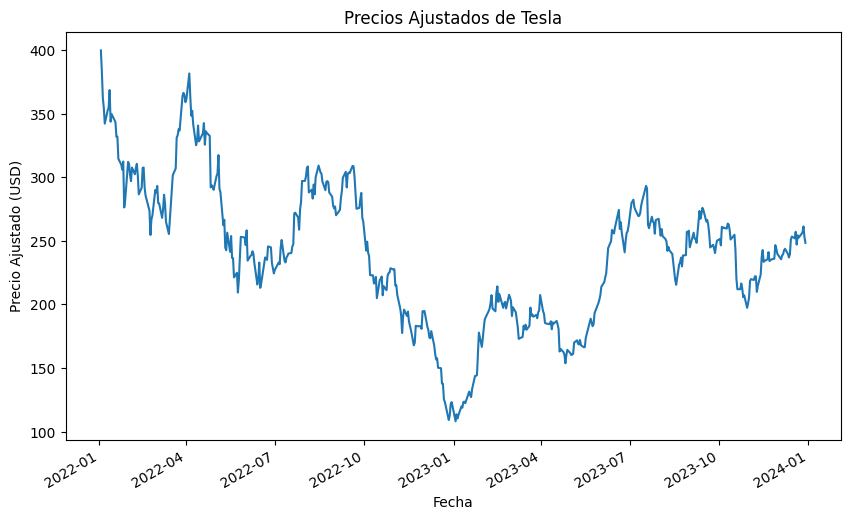

In [20]:
tesla = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
tesla.columns = tesla.columns.droplevel(1)  # Ajustar MultiIndex
tesla['Adj Close'].plot(title="Precios Ajustados de Tesla", figsize=(10, 6))
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado (USD)")
plt.show()

## Ejercicio 8

Genera un gráfico de la serie temporal de los precios ajustados de Microsoft (MSFT) y Apple (AAPL) desde el 1 de enero de 2020 hasta el 1 de enero de 2024. El gráfico debe mostrar solo los precios ajustados.

[*********************100%***********************]  2 of 2 completed


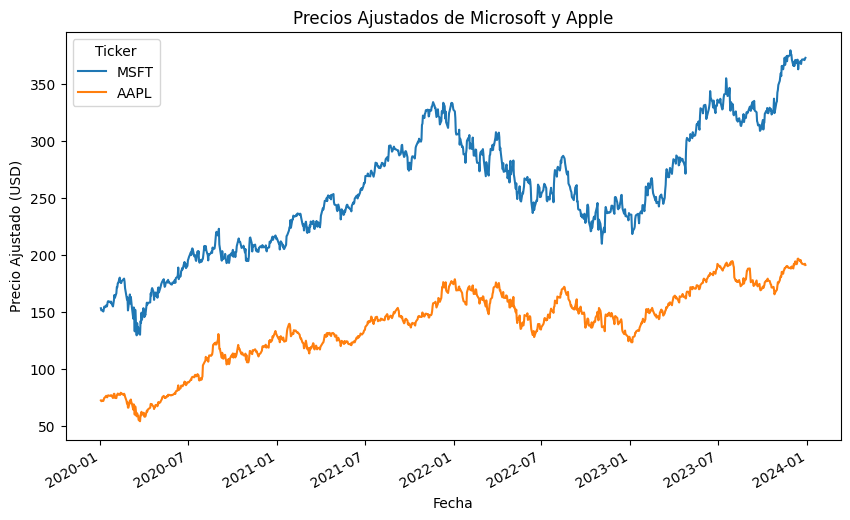

In [21]:
tecnologia = yf.download(["MSFT", "AAPL"], start="2020-01-01", end="2024-01-01")
tecnologia = tecnologia['Adj Close']  # Ajustar MultiIndex
tecnologia[['MSFT', 'AAPL']].plot(title="Precios Ajustados de Microsoft y Apple", figsize=(10, 6))
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado (USD)")
plt.show()

## Ejercicio 9

Genera un gráfico de la serie temporal de los precios ajustados de las empresas del portafolio 1 (Exxon Mobil XOM, Coca-Cola KO, y Alphabet GOOGL) desde el 1 de enero de 2018 hasta el 1 de enero de 2024. El gráfico debe mostrar solo los precios ajustados.

[*********************100%***********************]  3 of 3 completed


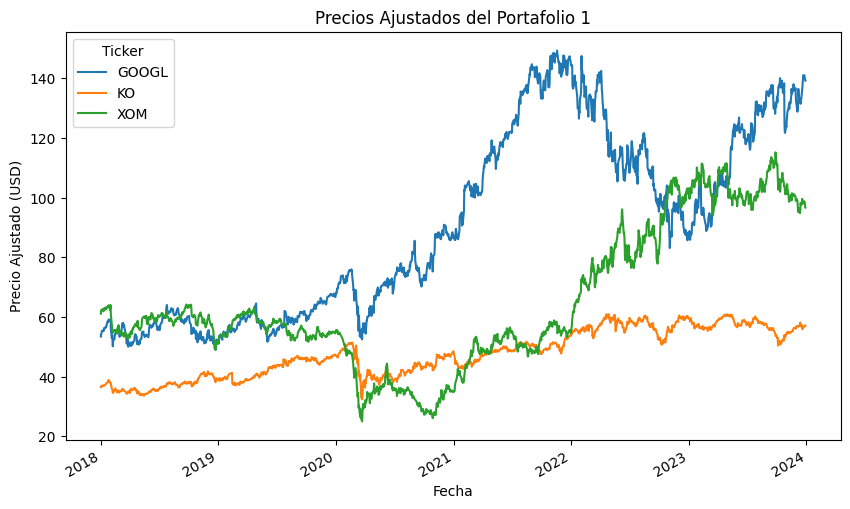

In [22]:
portafolio_1 = yf.download(["XOM", "KO", "GOOGL"], start="2018-01-01", end="2024-01-01")
portafolio_1 = portafolio_1['Adj Close']  # Ajustar MultiIndex
portafolio_1.plot(title="Precios Ajustados del Portafolio 1", figsize=(10, 6))
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado (USD)")
plt.show()


## Ejercicio 10

Genera un gráfico de la serie temporal de los precios ajustados del índice Nasdaq (^IXIC) entre el 1 de enero de 2019 y el 1 de enero de 2024. El gráfico debe mostrar solo los precios ajustados.

[*********************100%***********************]  1 of 1 completed


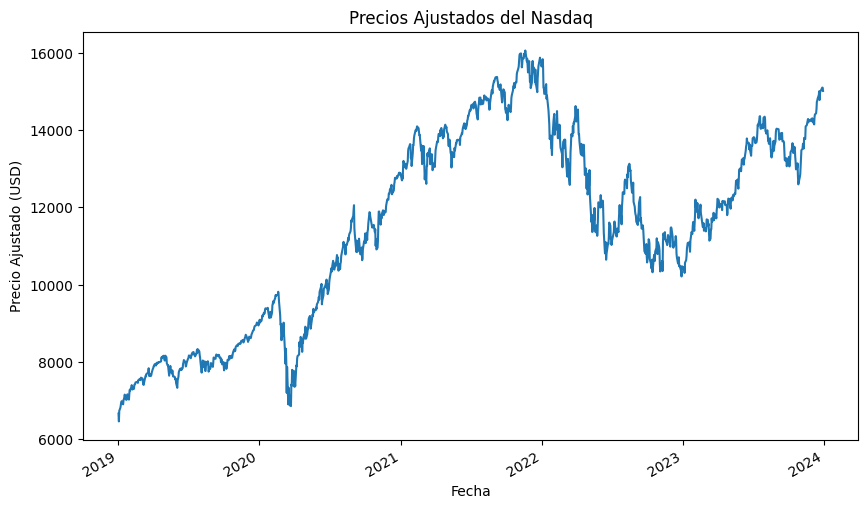

In [23]:
nasdaq = yf.download("^IXIC", start="2019-01-01", end="2024-01-01")
nasdaq.columns = nasdaq.columns.droplevel(1)  # Ajustar MultiIndex
nasdaq['Adj Close'].plot(title="Precios Ajustados del Nasdaq", figsize=(10, 6))
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado (USD)")
plt.show()

## Ejercicio 11

Genera un gráfico de la serie temporal de los precios ajustados del índice S&P 500 (^GSPC) entre el 1 de enero de 2020 y el 1 de enero de 2024. El gráfico debe mostrar solo los precios ajustados.

[*********************100%***********************]  1 of 1 completed


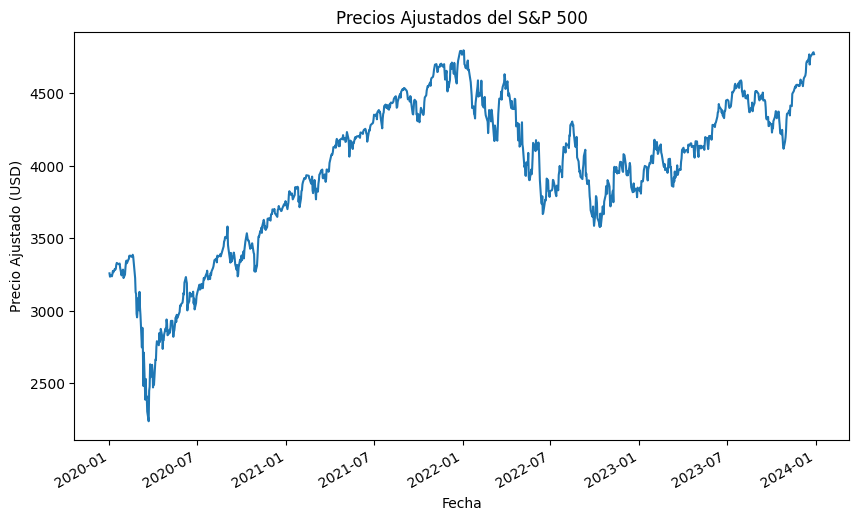

In [24]:
sp500 = yf.download("^GSPC", start="2020-01-01", end="2024-01-01")
sp500.columns = sp500.columns.droplevel(1)  # Ajustar MultiIndex
sp500['Adj Close'].plot(title="Precios Ajustados del S&P 500", figsize=(10, 6))
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado (USD)")
plt.show()

## Ejercicio 12

Genera un gráfico de la serie temporal de los precios ajustados de Microsoft (MSFT) y Apple (AAPL) utilizando subplots para mostrar ambos gráficos en una sola figura, con un gráfico para cada empresa.

[*********************100%***********************]  2 of 2 completed


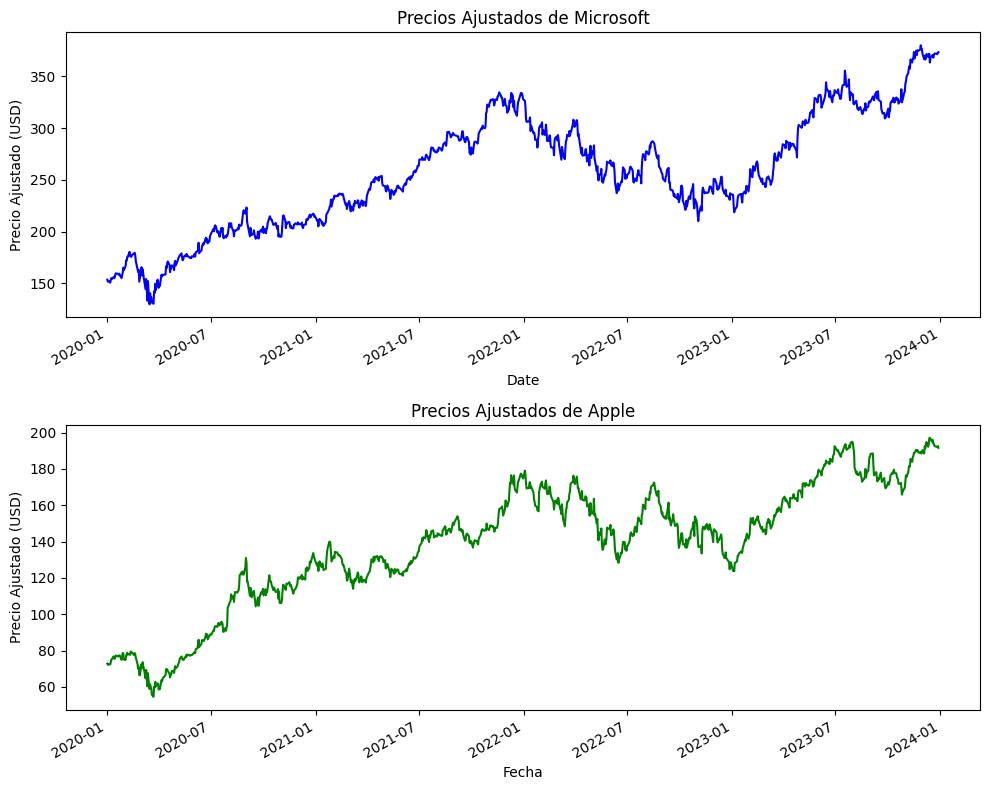

In [25]:
tecnologia = yf.download(["MSFT", "AAPL"], start="2020-01-01", end="2024-01-01")
tecnologia = tecnologia['Adj Close']  # Ajustar MultiIndex

# Crear subgráficos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de Microsoft
tecnologia['MSFT'].plot(ax=axes[0], title="Precios Ajustados de Microsoft", color='blue')
axes[0].set_ylabel("Precio Ajustado (USD)")

# Gráfico de Apple
tecnologia['AAPL'].plot(ax=axes[1], title="Precios Ajustados de Apple", color='green')
axes[1].set_ylabel("Precio Ajustado (USD)")

plt.xlabel("Fecha")
plt.tight_layout()
plt.show()


# 3. Transformaciones de Datos: Diferencias y Cambios Porcentuales

Las transformaciones como el cálculo de diferencias y cambios porcentuales son técnicas fundamentales para analizar el comportamiento de los precios de los activos financieros a lo largo del tiempo. Estas transformaciones ayudan a evaluar la variabilidad y el rendimiento de los activos, y son herramientas clave en el análisis de rentabilidad y volatilidad.

**Cálculo de Diferencias**

El cálculo de diferencias se utiliza para medir la variación en el precio de un activo entre dos periodos consecutivos, ya sea diario, semanal, etc. Esta transformación proporciona una visión clara de cuánto ha cambiado el precio de un activo de un periodo al siguiente.

**Proceso**:
Para calcular la diferencia, se usa el método `diff()` de Pandas, que resta el valor de la fila anterior al valor de la fila actual.

**Ejemplo**:
Si queremos calcular la diferencia diaria de los precios ajustados de Tesla:

In [26]:
tesla = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
tesla = tesla['Adj Close']  # Ajustar MultiIndex

# Calcular la diferencia diaria de los precios ajustados
diferencias = tesla.diff()

# Mostrar las primeras filas
diferencias.head()

[*********************100%***********************]  1 of 1 completed


Ticker,TSLA
Date,
2022-01-03,NaN
2022-01-04,-16.730011
2022-01-05,-20.489990
2022-01-06,-7.806671
2022-01-07,-12.579987


En este caso, `tesla.diff()` calcula la variación diaria del precio ajustado de Tesla. El primer valor será `NaN` porque no hay datos previos para calcular la diferencia.

**Cálculo de Cambios Porcentuales**

El cálculo de cambios porcentuales mide la variación relativa del precio de un activo entre dos periodos consecutivos, expresado como un porcentaje. Esto es útil para evaluar el rendimiento de una inversión y comparar la rentabilidad de diferentes activos o periodos.

**Fórmula**:
$$
\text{Cambio porcentual} = \frac{\text{Precio actual} - \text{Precio anterior}}{\text{Precio anterior}}
$$

**Ejemplo**:
Si queremos calcular el cambio porcentual diario de los precios ajustados de Tesla:

In [27]:
tesla = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
tesla = tesla['Adj Close']  # Ajustar MultiIndex

# Calcular el cambio porcentual diario
cambio_porcentual = tesla.pct_change()

# Mostrar las primeras filas
cambio_porcentual.head()

[*********************100%***********************]  1 of 1 completed


Ticker,TSLA
Date,
2022-01-03,NaN
2022-01-04,-0.041833
2022-01-05,-0.053471
2022-01-06,-0.021523
2022-01-07,-0.035447


En este caso, `tesla.pct_change()` calcula el cambio porcentual diario en los precios ajustados de Tesla. Al igual que con las diferencias, el primer valor será `NaN`.

---

**Aplicaciones Comunes de las Diferencias y Cambios Porcentuales**

1. **Análisis de volatilidad**: Las diferencias y cambios porcentuales permiten analizar la volatilidad de los activos. Grandes variaciones en las diferencias o cambios porcentuales indican que el precio ha fluctuado considerablemente en un corto periodo.
   
2. **Rendimiento de la inversión**: Los cambios porcentuales son una forma estándar de medir el rendimiento de un activo en un periodo dado, como el rendimiento diario, mensual, o anual.
   
3. **Detección de tendencias**: Un análisis de las diferencias puede ayudar a identificar tendencias en los precios. Si las diferencias son consistentemente positivas, indica una tendencia alcista, mientras que diferencias negativas sugieren una tendencia a la baja.


## Ejercicio 13

Descarga los datos ajustados de cierre de Tesla desde el 1 de enero de 2022 hasta el 1 de enero de 2024. Calcula las diferencias diarias de los precios ajustados de Tesla y muestra en una gráfica tanto los precios ajustados como las diferencias diarias.

[*********************100%***********************]  1 of 1 completed


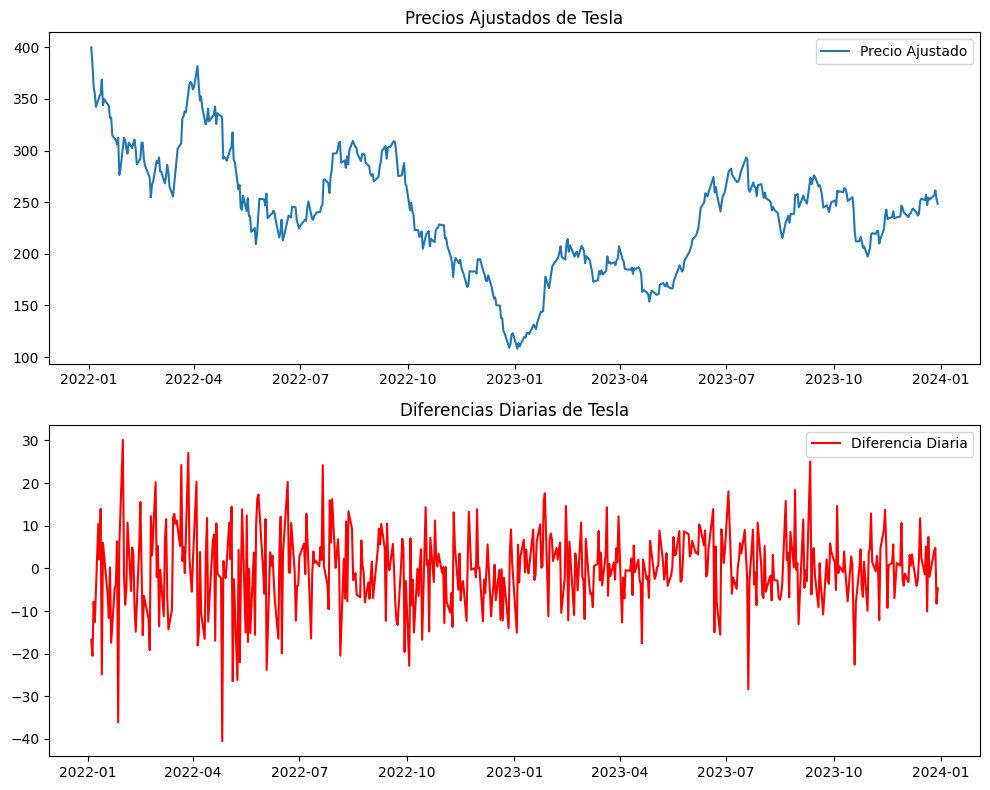

In [29]:
tesla = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
tesla = tesla['Adj Close']  # Ajustar MultiIndex

# Calcular las diferencias diarias
diferencias = tesla.diff()

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de precios ajustados
ax[0].plot(tesla, label='Precio Ajustado')
ax[0].set_title('Precios Ajustados de Tesla')
ax[0].legend()

# Gráfico de diferencias diarias
ax[1].plot(diferencias, label='Diferencia Diaria', color='red')
ax[1].set_title('Diferencias Diarias de Tesla')
ax[1].legend()

plt.tight_layout()
plt.show()

## Ejercicio 14

Usando los datos de Apple desde el 1 de enero de 2020 hasta el 1 de enero de 2024, calcula las diferencias diarias y muestra en una tabla los precios ajustados junto con sus respectivas diferencias.

In [32]:
apple = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
apple = apple['Adj Close']  # Ajustar MultiIndex

# Calcular las diferencias diarias
apple['AAPL_diff'] = apple.diff()

apple.head()

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL,AAPL_diff
Date,,
2020-01-02,72.796005,NaN
2020-01-03,72.088287,-0.707718
2020-01-06,72.662720,0.574432
2020-01-07,72.320984,-0.341736
2020-01-08,73.484337,1.163353


## Ejercicio 15

Descarga los precios ajustados de Microsoft desde el 1 de enero de 2021 hasta el 1 de enero de 2024. Calcula las diferencias mensuales de los precios ajustados y grafica tanto los precios ajustados como las diferencias mensuales.

[*********************100%***********************]  1 of 1 completed
<ipython-input-33-0d1ecbf1245c>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  microsoft_mensual = microsoft.resample('M').last()  # Último precio de cada mes


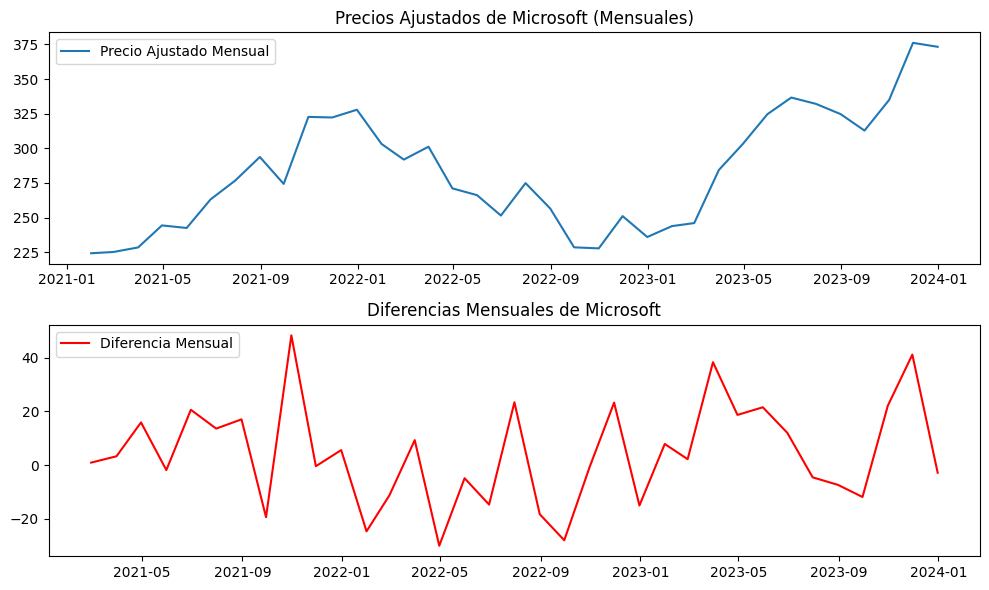

In [33]:
microsoft = yf.download("MSFT", start="2021-01-01", end="2024-01-01")
microsoft = microsoft['Adj Close']  # Ajustar MultiIndex

# Resampleo para obtener precios mensuales y calcular diferencias
microsoft_mensual = microsoft.resample('M').last()  # Último precio de cada mes
diferencias_mensuales = microsoft_mensual.diff()

# Graficar precios ajustados y diferencias mensuales
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(microsoft_mensual, label='Precio Ajustado Mensual')
plt.title('Precios Ajustados de Microsoft (Mensuales)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(diferencias_mensuales, label='Diferencia Mensual', color='red')
plt.title('Diferencias Mensuales de Microsoft')
plt.legend()

plt.tight_layout()
plt.show()

## Ejercicio 16

Utilizando los datos de Amazon desde el 1 de enero de 2022 hasta el 1 de enero de 2024, calcula las diferencias semanales de los precios ajustados. Muestra las primeras 10 filas tanto de los precios ajustados como de las diferencias semanales en una tabla.

In [37]:
amazon = yf.download("AMZN", start="2022-01-01", end="2024-01-01")
amazon = amazon['Adj Close']  # Ajustar MultiIndex

# Resampleo para obtener precios semanales y calcular diferencias
amazon_semanal = amazon.resample('W').last()  # Último precio de cada semana
amazon_semanal['AMZN_diff'] = amazon_semanal.diff()

# Mostrar las primeras 10 filas en una tabla
amazon_semanal.head(10)

[*********************100%***********************]  1 of 1 completed


Ticker,AMZN,AMZN_diff
Date,,
2022-01-09,162.554001,NaN
2022-01-16,162.138000,-0.416000
2022-01-23,142.643005,-19.494995
2022-01-30,143.977997,1.334991
2022-02-06,157.639496,13.661499
2022-02-13,153.293503,-4.345993
2022-02-20,152.601501,-0.692001
2022-02-27,153.788498,1.186996
2022-03-06,145.641006,-8.147491


## Ejercicio 17

Usando los datos de Tesla desde el 1 de enero de 2022 hasta el 1 de enero de 2024, calcula las diferencias porcentuales diarias de los precios ajustados y agrega una nueva columna con las diferencias a la tabla original.

In [40]:
tesla = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
tesla = tesla['Adj Close']  # Ajustar MultiIndex

# Calcular las diferencias porcentuales diarias y añadirla a la tabla original
tesla['TSLA_pctchange'] = tesla.pct_change()

tesla.head()

[*********************100%***********************]  1 of 1 completed


Ticker,TSLA,TSLA_pctchange
Date,,
2022-01-03,399.926666,NaN
2022-01-04,383.196655,-0.041833
2022-01-05,362.706665,-0.053471
2022-01-06,354.899994,-0.021523
2022-01-07,342.320007,-0.035447


## Ejercicio 18

Descarga los precios ajustados de Apple desde el 1 de enero de 2021 hasta el 1 de enero de 2024. Calcula las diferencias mensuales de los precios ajustados y agrégalas a la tabla original como una nueva columna.

In [41]:
apple = yf.download("AAPL", start="2021-01-01", end="2024-01-01")
apple = apple['Adj Close']  # Ajustar MultiIndex

# Resampleo para obtener precios mensuales y calcular diferencias
apple_mensual = apple.resample('M').last()  # Último precio de cada mes
apple_mensual['AAPL_diff'] = apple_mensual.diff()  # Calcular diferencias mensuales

apple_mensual.head()

[*********************100%***********************]  1 of 1 completed
<ipython-input-41-1adb32da4d1d>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  apple_mensual = apple.resample('M').last()  # Último precio de cada mes


Ticker,AAPL,AAPL_diff
Date,,
2021-01-31,129.037750,NaN
2021-02-28,118.751884,-10.285866
2021-03-31,119.623474,0.871590
2021-04-30,128.740936,9.117462
2021-05-31,122.239891,-6.501045


## Ejercicio 19

Usa los datos de Microsoft desde el 1 de enero de 2021 hasta el 1 de enero de 2024. Calcula las diferencias semanales de los precios ajustados, agrégalas a la tabla original y muestra en una gráfica tanto los precios ajustados como las diferencias semanales.

[*********************100%***********************]  1 of 1 completed


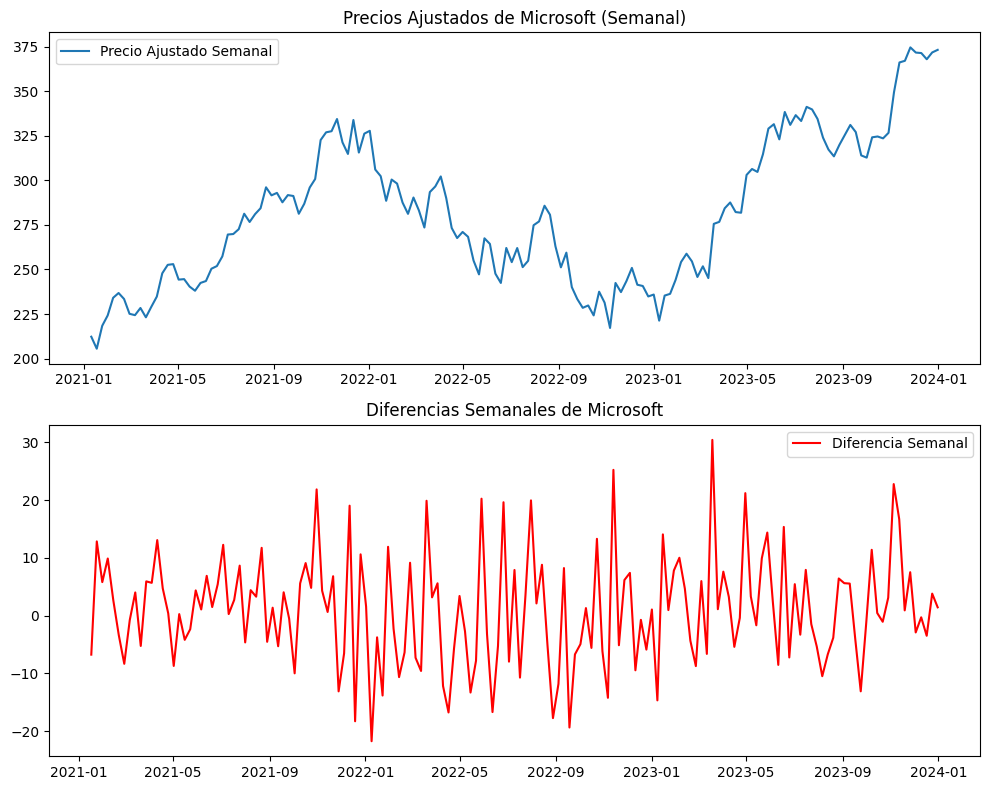

In [43]:
microsoft = yf.download("MSFT", start="2021-01-01", end="2024-01-01")
microsoft = microsoft['Adj Close']  # Ajustar MultiIndex

# Resampleo para obtener precios semanales y calcular diferencias
microsoft_semanal = microsoft.resample('W').last()  # Último precio de cada semana
microsoft_semanal['MSFT_diff'] = microsoft_semanal.diff()  # Calcular diferencias semanales

# Graficar precios ajustados y diferencias semanales
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de precios ajustados
ax[0].plot(microsoft_semanal['MSFT'], label='Precio Ajustado Semanal')
ax[0].set_title('Precios Ajustados de Microsoft (Semanal)')
ax[0].legend()

# Gráfico de diferencias semanales
ax[1].plot(microsoft_semanal['MSFT_diff'], label='Diferencia Semanal', color='red')
ax[1].set_title('Diferencias Semanales de Microsoft')
ax[1].legend()

plt.tight_layout()
plt.show()

## Ejercicio 20

Descarga los datos de Amazon desde el 1 de enero de 2020 hasta el 1 de enero de 2024. Calcula las diferencias mensuales de los precios ajustados y agrégalas a la tabla original. Luego, muestra las primeras 10 filas de la tabla resultante.

In [44]:
amazon = yf.download("AMZN", start="2020-01-01", end="2024-01-01")
amazon = amazon['Adj Close']  # Ajustar MultiIndex

# Resampleo para obtener precios mensuales y calcular diferencias
amazon_mensual = amazon.resample('M').last()  # Último precio de cada mes
amazon_mensual['AMZN_diff'] = amazon_mensual.diff()  # Calcular diferencias mensuales

amazon_mensual.head(10)

[*********************100%***********************]  1 of 1 completed
<ipython-input-44-cdaecb90ccf5>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  amazon_mensual = amazon.resample('M').last()  # Último precio de cada mes


Ticker,AMZN,AMZN_diff
Date,,
2020-01-31,100.435997,NaN
2020-02-29,94.187500,-6.248497
2020-03-31,97.486000,3.298500
2020-04-30,123.699997,26.213997
2020-05-31,122.118500,-1.581497
2020-06-30,137.940994,15.822495
2020-07-31,158.233994,20.292999
2020-08-31,172.548004,14.314011
2020-09-30,157.436493,-15.111511


## Ejercicio 21

Usa los datos de Microsoft desde el 1 de enero de 2022 hasta el 1 de enero de 2024. Calcula las diferencias diarias y los cambios porcentuales, y agrégalos como nuevas columnas a la tabla original.

In [46]:
microsoft = yf.download("MSFT", start="2022-01-01", end="2024-01-01")
microsoft = microsoft['Adj Close']  # Ajustar MultiIndex

# Calcular las diferencias diarias
microsoft['MSFT_diff'] = microsoft.diff()

# Calcular los cambios porcentuales diarios
microsoft['MSFT_pct_change'] = microsoft['MSFT'].pct_change()

microsoft.head()

[*********************100%***********************]  1 of 1 completed


Ticker,MSFT,MSFT_diff,MSFT_pct_change
Date,,,
2022-01-03,326.287720,NaN,NaN
2022-01-04,320.692810,-5.594910,-0.017147
2022-01-05,308.382111,-12.310699,-0.038388
2022-01-06,305.945282,-2.436829,-0.007902
2022-01-07,306.101227,0.155945,0.000510


# 3. **Estadística para Series Financieras**

En el análisis de series temporales financieras, se emplean herramientas estadísticas para medir el comportamiento de los precios de activos y portafolios a lo largo del tiempo. A continuación, se explican algunos conceptos clave y cómo se aplican en este contexto.

## **3.1. Retorno Esperado**

El retorno esperado es una medida estadística que indica el rendimiento promedio de una inversión durante un periodo determinado. En el contexto de las series financieras, se calcula como el promedio de los retornos diarios, semanales, mensuales, etc.

El **retorno** se calcula como el cambio porcentual en el precio de un activo entre dos puntos en el tiempo:

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Donde:
- $R_t$ es el retorno en el tiempo $t$.
- $P_t$ es el precio del activo en el tiempo $t$.
- $P_{t-1}$ es el precio del activo en el tiempo $t-1$.

El **retorno esperado** se calcula como el promedio de estos retornos a lo largo de un periodo:

$$
\text{Retorno Esperado} = \frac{1}{n} \sum_{t=1}^{n} R_t
$$

**Ejemplo**: Si tenemos los precios ajustados de una acción para un periodo de 30 días, el retorno esperado es el promedio de todos los retornos diarios.

## **3.2. Volatilidad**

La volatilidad mide la dispersión o variabilidad de los retornos de un activo. En términos financieros, una mayor volatilidad significa un mayor riesgo, ya que el precio del activo tiene fluctuaciones más grandes.

La **volatilidad histórica** se calcula como la desviación estándar de los retornos:

$$
\sigma = \sqrt{\frac{1}{n-1} \sum_{t=1}^{n} (R_t - \bar{R})^2}
$$

Donde:
- $ \sigma $ es la volatilidad (desviación estándar de los retornos).
- $ R_t $ son los retornos individuales.
- $ \bar{R} $ es el retorno promedio.

**Ejemplo**: Si tenemos los retornos diarios de una acción, la volatilidad diaria es la desviación estándar de esos retornos.

## **3.3. Distribución Normal en Finanzas**

La **distribución normal** es una de las distribuciones más utilizadas en finanzas para modelar los precios de los activos y sus retornos, bajo la suposición de que los rendimientos de los activos son independientes y tienen distribuciones de probabilidad simétricas alrededor de un valor medio (retorno esperado).

En muchas ocasiones, se asume que los retornos de los activos siguen una distribución normal para simplificar el análisis, lo que facilita el cálculo de probabilidades y la estimación de riesgos.

Los **parámetros** más relevantes de la distribución normal son:
- La **media** ($\mu$): El retorno esperado.
- La **desviación estándar** ($\sigma$): La volatilidad.

## **3.4. Cálculo del Retorno Esperado y el Riesgo de un Portafolio**

Un **portafolio** es un conjunto de activos (acciones, bonos, etc.) cuya rentabilidad y riesgo son determinadas por los retornos de los activos que lo componen. El **retorno esperado de un portafolio** es la media ponderada de los retornos esperados de los activos que lo componen:

$$
R_p = \sum_{i=1}^{n} w_i R_i
$$

Donde:
- $ R_p $ es el retorno esperado del portafolio.
- $ w_i $ es la ponderación del activo $i$ en el portafolio.
- $ R_i $ es el retorno esperado del activo $i$.

La **volatilidad de un portafolio** depende de las volatilidades de los activos individuales y de la correlación entre ellos. El cálculo de la volatilidad del portafolio se realiza usando la siguiente fórmula:

$$
\sigma_p = \sqrt{\sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij}}
$$

Donde:
- $ \sigma_p $ es la volatilidad del portafolio.
- $ \sigma_{ij} $ es la covarianza entre los activos $i$ y $j$.
- $ w_i $ y $ w_j $ son las ponderaciones de los activos $i$ y $j$ en el portafolio.

## **3.5. Uso de la Distribución Normal en el Cálculo de Riesgo**

Una vez que asumimos que los retornos de los activos siguen una distribución normal, podemos calcular la probabilidad de que el retorno de un activo o portafolio esté dentro de un cierto rango utilizando la **curva normal**. Este enfoque es útil para estimar la probabilidad de pérdidas o ganancias en el futuro.

Por ejemplo, se puede calcular el **Value at Risk (VaR)**, una medida del riesgo que estima la pérdida máxima que un portafolio puede experimentar con un nivel de confianza dado.

## **3.6. Cálculo de la Correlación entre Activos**

La **correlación** mide cómo se mueven dos activos en relación entre sí. Se calcula mediante el siguiente coeficiente:

$$
\rho_{i,j} = \frac{\text{Cov}(R_i, R_j)}{\sigma_i \sigma_j}
$$

Donde:
- $ \rho_{i,j} $ es el coeficiente de correlación entre los retornos de los activos $i$ y $j$.
- **Cov** es la covarianza entre los retornos de los dos activos.
- $ \sigma_i $ y $ \sigma_j $ son las desviaciones estándar de los retornos de los activos $i$ y $j$.

Este cálculo es importante al construir un portafolio, ya que activos con correlaciones negativas o bajas pueden ayudar a reducir el riesgo global del portafolio.


## Ejemplo 22

Cálculo del Retorno Esperado y Volatilidad de una Acción

En este ejemplo, vamos a calcular el retorno esperado y la volatilidad de las acciones de Apple (AAPL) desde el 1 de enero de 2020 hasta el 1 de enero de 2024.

In [52]:
# Descargar los datos de AAPL
apple = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
apple = apple['Adj Close']  # Ajustar MultiIndex

# Calcular el retorno diario
apple_ret = apple.pct_change().AAPL

# Retorno esperado (promedio de los retornos diarios)
apple_expected_return = apple_ret.mean()

# Volatilidad (desviación estándar de los retornos diarios)
apple_volatility = apple_ret.std()

# Mostrar resultados
print(f"\nRetorno esperado de AAPL: {apple_expected_return * 100:.2f}%")
print(f"\nVolatilidad de AAPL: {apple_volatility * 100:.2f}%")

[*********************100%***********************]  1 of 1 completed


Retorno esperado de AAPL: 0.12%

Volatilidad de AAPL: 2.11%


## Ejemplo 23

Cálculo de Retorno Esperado y Volatilidad de un Portafolio de Acciones

Ahora, vamos a calcular el retorno esperado y la volatilidad de un portafolio que consiste en dos acciones: Apple (AAPL) y Microsoft (MSFT), donde Apple tiene un peso del 60% y Microsoft un 40%.

In [64]:
# Descargar los datos de MSFT
msft = yf.download("MSFT", start="2020-01-01", end="2024-01-01")
msft = msft['Adj Close']  # Ajustar MultiIndex

# Descargar los datos de AAPL
apple = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
apple = apple['Adj Close']  # Ajustar MultiIndex

# Calcular los retornos diarios de ambas acciones
apple_ret = apple.pct_change()
msft_ret = msft.pct_change()

# Asegurarse de que ambas series tengan las mismas fechas
data = pd.concat([apple_ret, msft_ret], axis=1).dropna()
apple_ret = data.iloc[:, 0]  # Retornos de Apple
msft_ret = data.iloc[:, 1]   # Retornos de MSFT

# Retorno esperado del portafolio (media ponderada)
weights = np.array([0.6, 0.4])  # Pesos del portafolio
expected_returns = np.array([apple_ret.mean(), msft_ret.mean()])
portfolio_expected_return = np.dot(weights, expected_returns)

# Volatilidad del portafolio
# Calcular la matriz de covarianza de los dos activos (2x2)
cov_matrix = np.cov(apple_ret, msft_ret)  # Calculando la covarianza entre los dos activos

# Calcular la volatilidad del portafolio
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Mostrar resultados
print(f"\nRetorno esperado del portafolio: {portfolio_expected_return * 100:.2f}%")
print(f"Volatilidad del portafolio: {portfolio_volatility * 100:.2f}%")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Retorno esperado del portafolio: 0.11%
Volatilidad del portafolio: 1.98%


## Ejemplo 24

Graficar el rendimiento del portafolio frente a sus componentes

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


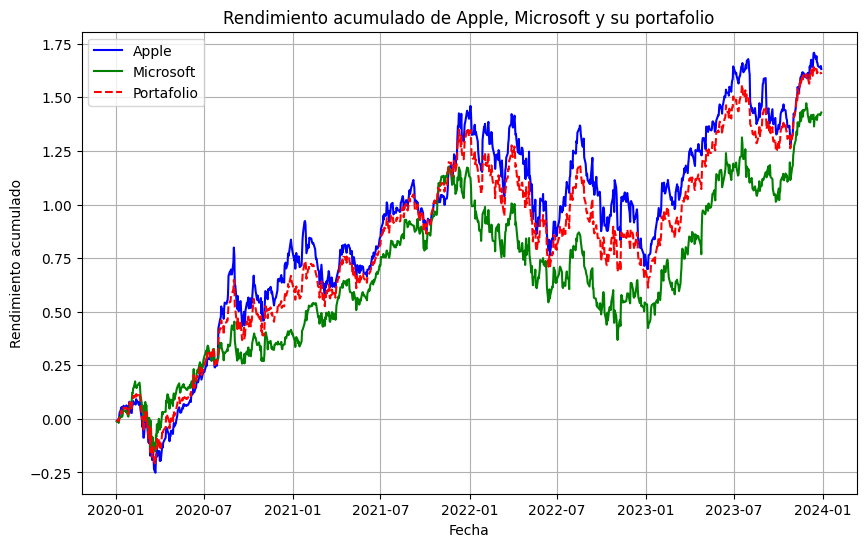

In [65]:
# Descargar los datos de MSFT y AAPL
msft = yf.download("MSFT", start="2020-01-01", end="2024-01-01")
msft = msft['Adj Close']  # Ajustar MultiIndex

apple = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
apple = apple['Adj Close']  # Ajustar MultiIndex

# Calcular los retornos diarios de ambas acciones
apple_ret = apple.pct_change()
msft_ret = msft.pct_change()

# Asegurarse de que ambas series tengan las mismas fechas
data = pd.concat([apple_ret, msft_ret], axis=1).dropna()
apple_ret = data.iloc[:, 0]  # Retornos de Apple
msft_ret = data.iloc[:, 1]   # Retornos de MSFT

# Crear portafolio con pesos 0.6 Apple y 0.4 Microsoft
weights = np.array([0.6, 0.4])
portfolio_ret = weights[0] * apple_ret + weights[1] * msft_ret

# Graficar el rendimiento acumulado de las acciones y del portafolio
# Calcular el rendimiento acumulado
portfolio_cum_ret = (1 + portfolio_ret).cumprod() - 1
apple_cum_ret = (1 + apple_ret).cumprod() - 1
msft_cum_ret = (1 + msft_ret).cumprod() - 1

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(apple_cum_ret, label='Apple', color='blue')
plt.plot(msft_cum_ret, label='Microsoft', color='green')
plt.plot(portfolio_cum_ret, label='Portafolio', color='red', linestyle='--')

plt.title('Rendimiento acumulado de Apple, Microsoft y su portafolio')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento acumulado')
plt.legend()
plt.grid(True)
plt.show()

## Ejemplo 25

Ejemplo 3: Graficar la volatilidad histórica de las acciones y el portafolio

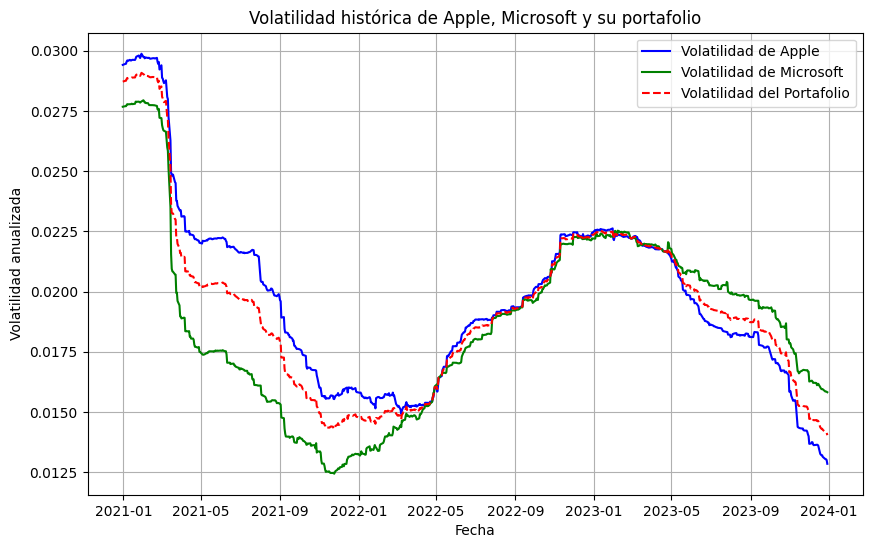

In [67]:
# Calcular la volatilidad histórica del portafolio y sus componentes
apple_vol = apple_ret.rolling(window=252).std()  # Volatilidad anualizada de Apple
msft_vol = msft_ret.rolling(window=252).std()  # Volatilidad anualizada de Microsoft
portfolio_vol = (weights[0] * apple_vol + weights[1] * msft_vol)  # Volatilidad del portafolio

# Graficar la volatilidad
plt.figure(figsize=(10, 6))
plt.plot(apple_vol, label='Volatilidad de Apple', color='blue')
plt.plot(msft_vol, label='Volatilidad de Microsoft', color='green')
plt.plot(portfolio_vol, label='Volatilidad del Portafolio', color='red', linestyle='--')

plt.title('Volatilidad histórica de Apple, Microsoft y su portafolio')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad anualizada')
plt.legend()
plt.grid(True)
plt.show()

## Ejemplo 26

Definir límites de retorno utilizando 1, 2 y 3 desviaciones estándar para Apple
En este caso, vamos a utilizar la desviación estándar de los retornos diarios de Apple para establecer los límites de retorno esperados bajo diferentes intervalos de confianza (1, 2 y 3 desviaciones estándar).

In [70]:
# Descargar los datos de Apple
apple = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
apple = apple['Adj Close']  # Ajustar MultiIndex

# Calcular los retornos diarios
apple_ret = apple.pct_change().AAPL

# Calcular la media y desviación estándar de los retornos
mean_return = apple_ret.mean()
std_dev = apple_ret.std()

# Definir los límites esperados de los retornos (1, 2 y 3 desviaciones estándar)
confidence_1sd = mean_return + std_dev
confidence_2sd = mean_return + 2 * std_dev
confidence_3sd = mean_return + 3 * std_dev

# Mostrar los resultados
print(f"\nRetorno esperado: {mean_return * 100:.2f}%")
print(f"Limite con 1 SD: {confidence_1sd * 100:.2f}%")
print(f"Limite con 2 SD: {confidence_2sd * 100:.2f}%")
print(f"Limite con 3 SD: {confidence_3sd * 100:.2f}%")

[*********************100%***********************]  1 of 1 completed


Retorno esperado: 0.12%
Limite con 1 SD: 2.23%
Limite con 2 SD: 4.35%
Limite con 3 SD: 6.46%


## Ejemplo 27

Comparar los límites de retorno para el portafolio de Apple y Microsoft
Aquí vamos a aplicar lo mismo, pero ahora calcularemos los límites de retorno utilizando los rendimientos de un portafolio compuesto por Apple y Microsoft. Utilizaremos las desviaciones estándar y las covarianzas de los activos para obtener el riesgo conjunto.

In [71]:
# Descargar los datos de MSFT y AAPL
msft = yf.download("MSFT", start="2020-01-01", end="2024-01-01")
msft = msft['Adj Close']  # Ajustar MultiIndex

# Calcular los retornos diarios de ambas acciones
apple_ret = apple.pct_change()
msft_ret = msft.pct_change()

# Asegurarse de que ambas series tengan las mismas fechas
data = pd.concat([apple_ret, msft_ret], axis=1).dropna()
apple_ret = data.iloc[:, 0]  # Retornos de Apple
msft_ret = data.iloc[:, 1]   # Retornos de MSFT

# Media y desviación estándar de los retornos individuales
mean_apple = apple_ret.mean()
mean_msft = msft_ret.mean()
std_apple = apple_ret.std()
std_msft = msft_ret.std()

# Covarianza entre Apple y Microsoft
cov_matrix = np.cov(apple_ret[1:], msft_ret[1:])

# Crear portafolio con pesos 0.6 Apple y 0.4 Microsoft
weights = np.array([0.6, 0.4])

# Cálculo de la desviación estándar del portafolio (volatilidad)
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Definir los límites esperados de los retornos (1, 2 y 3 desviaciones estándar) para el portafolio
portfolio_mean_return = np.dot(weights, [mean_apple, mean_msft])
portfolio_confidence_1sd = portfolio_mean_return + portfolio_std_dev
portfolio_confidence_2sd = portfolio_mean_return + 2 * portfolio_std_dev
portfolio_confidence_3sd = portfolio_mean_return + 3 * portfolio_std_dev

# Mostrar los resultados
print(f"Retorno esperado del portafolio: {portfolio_mean_return * 100:.2f}%")
print(f"Limite con 1 SD (Portafolio): {portfolio_confidence_1sd * 100:.2f}%")
print(f"Limite con 2 SD (Portafolio): {portfolio_confidence_2sd * 100:.2f}%")
print(f"Limite con 3 SD (Portafolio): {portfolio_confidence_3sd * 100:.2f}%")


[*********************100%***********************]  1 of 1 completed

Retorno esperado del portafolio: 0.11%
Limite con 1 SD (Portafolio): 2.09%
Limite con 2 SD (Portafolio): 4.07%
Limite con 3 SD (Portafolio): 6.05%


## Ejemplo 28

Graficar los límites de retorno de un portafolio

Aquí graficamos los límites de retorno de un portafolio compuesto por Apple y Microsoft en función de las desviaciones estándar.

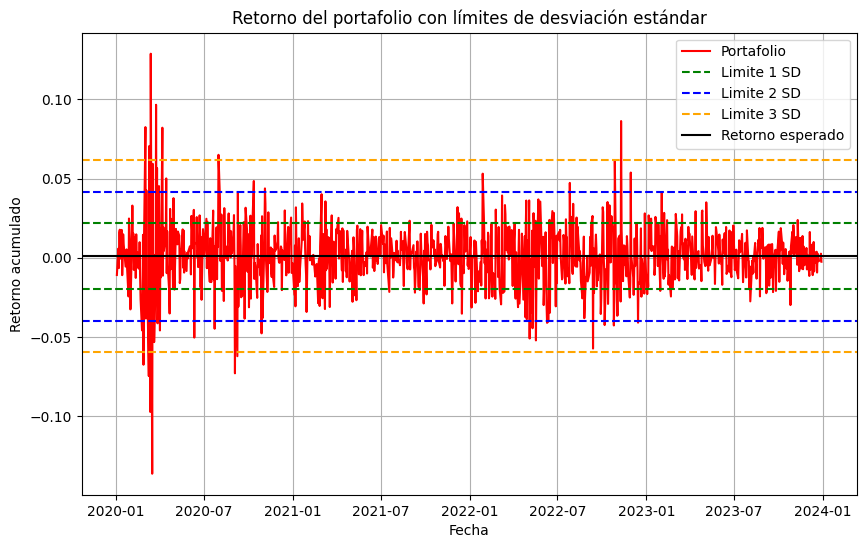

In [79]:
# Crear una serie de tiempo para el portafolio
portfolio_ret = weights[0] * apple_ret + weights[1] * msft_ret

# Calcular el retorno esperado
portfolio_esp = portfolio_ret.mean()

# Graficar el retorno acumulado y los límites de desviación estándar
plt.figure(figsize=(10, 6))

plt.plot(portfolio_ret, label='Portafolio', color='red')
plt.axhline(portfolio_esp + portfolio_confidence_1sd, color='green', linestyle='--', label='Limite 1 SD')
plt.axhline(portfolio_esp + portfolio_confidence_2sd, color='blue', linestyle='--', label='Limite 2 SD')
plt.axhline(portfolio_esp + portfolio_confidence_3sd, color='orange', linestyle='--', label='Limite 3 SD')
plt.axhline(portfolio_esp, label='Retorno esperado', color='black')
plt.axhline(portfolio_esp - portfolio_confidence_1sd, color='green', linestyle='--')
plt.axhline(portfolio_esp - portfolio_confidence_2sd, color='blue', linestyle='--')
plt.axhline(portfolio_esp - portfolio_confidence_3sd, color='orange', linestyle='--')


plt.title('Retorno del portafolio con límites de desviación estándar')
plt.xlabel('Fecha')
plt.ylabel('Retorno acumulado')
plt.legend()
plt.grid(True)
plt.show()

## Ejemplo 29

Retornos y Volatilidad de una Acción (AAPL)
Calcula el retorno diario y la volatilidad de una acción individual, como Apple (AAPL), durante un período determinado.

In [82]:
# Descargar los datos de AAPL
aapl = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
aapl = aapl['Adj Close']  # Ajustar MultiIndex

# Calcular los retornos diarios
aapl_ret = aapl.pct_change().AAPL

# Calcular la volatilidad diaria
aapl_volatility = aapl_ret.std()

# Mostrar resultados
print(f"\nVolatilidad diaria de AAPL: {aapl_volatility * 100:.2f}%")

[*********************100%***********************]  1 of 1 completed


Volatilidad diaria de AAPL: 2.11%


## Ejemplo 30

Determinar la Probabilidad de Obtener un Resultado Mayor o Menor a un Valor Específico

Calcula la probabilidad de que el retorno diario de un portafolio (compuesto por Apple y Microsoft) sea mayor que un valor específico (por ejemplo, 0.5%). Usa una distribución normal para aproximar esta probabilidad.

In [86]:
from scipy.stats import norm

# Definir el valor de interés
threshold = 0.005  # 0.5%

# Calcular el retorno esperado y la desviación estándar del portafolio
portfolio_esp = portfolio_ret.mean()
portfolio_vol = portfolio_ret.std()

# Calcular la probabilidad de obtener un retorno mayor al umbral
probability_greater = 1 - norm.cdf(threshold, loc=portfolio_esp, scale=portfolio_vol)

# Calcular la probabilidad de obtener un retorno menor al umbral
probability_less = norm.cdf(threshold, loc=portfolio_esp, scale=portfolio_vol)

# Mostrar resultados
print(f"Probabilidad de obtener un retorno mayor a {threshold * 100}%: {probability_greater * 100:.2f}%")
print(f"Probabilidad de obtener un retorno menor a {threshold * 100}%: {probability_less * 100:.2f}%")

Probabilidad de obtener un retorno mayor a 0.5%: 42.28%
Probabilidad de obtener un retorno menor a 0.5%: 57.72%


## Ejemplo 31

Gráfico de Histograma de Retornos con Límites de Desviación Estándar

Crea un histograma de los retornos diarios del portafolio y añade líneas que representen los límites de ±1, ±2 y ±3 desviaciones estándar del retorno esperado.

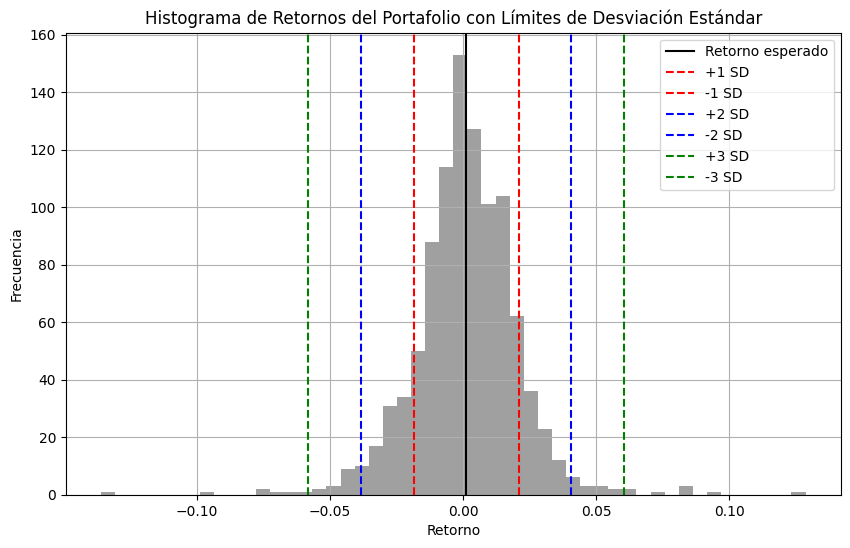

In [87]:
# Graficar el histograma de los retornos
plt.figure(figsize=(10, 6))
plt.hist(portfolio_ret, bins=50, alpha=0.75, color='gray')

# Líneas de los límites de desviación estándar
plt.axvline(portfolio_esp, color='black', label='Retorno esperado')
plt.axvline(portfolio_esp + portfolio_vol, color='red', linestyle='--', label='+1 SD')
plt.axvline(portfolio_esp - portfolio_vol, color='red', linestyle='--', label='-1 SD')
plt.axvline(portfolio_esp + 2 * portfolio_vol, color='blue', linestyle='--', label='+2 SD')
plt.axvline(portfolio_esp - 2 * portfolio_vol, color='blue', linestyle='--', label='-2 SD')
plt.axvline(portfolio_esp + 3 * portfolio_vol, color='green', linestyle='--', label='+3 SD')
plt.axvline(portfolio_esp - 3 * portfolio_vol, color='green', linestyle='--', label='-3 SD')

plt.title('Histograma de Retornos del Portafolio con Límites de Desviación Estándar')
plt.xlabel('Retorno')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

## Ejemplo 32

Determinar la Probabilidad de un Retorno Entre un Rango Específico

Calcula la probabilidad de que el retorno del portafolio esté entre un rango específico, por ejemplo, entre 0% y 0.5%.

In [88]:
# Definir los límites del rango
lower_limit = 0.0
upper_limit = 0.005  # 0.5%

# Calcular la probabilidad de que el retorno esté en el rango
probability_range = norm.cdf(upper_limit, loc=portfolio_esp, scale=portfolio_vol) - norm.cdf(lower_limit, loc=portfolio_esp, scale=portfolio_vol)

# Mostrar resultados
print(f"Probabilidad de que el retorno esté entre {lower_limit * 100}% y {upper_limit * 100}%: {probability_range * 100:.2f}%")

Probabilidad de que el retorno esté entre 0.0% y 0.5%: 10.04%


## Ejemplo 33

Comparación de la Dispersión de los Precios y los Retornos

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


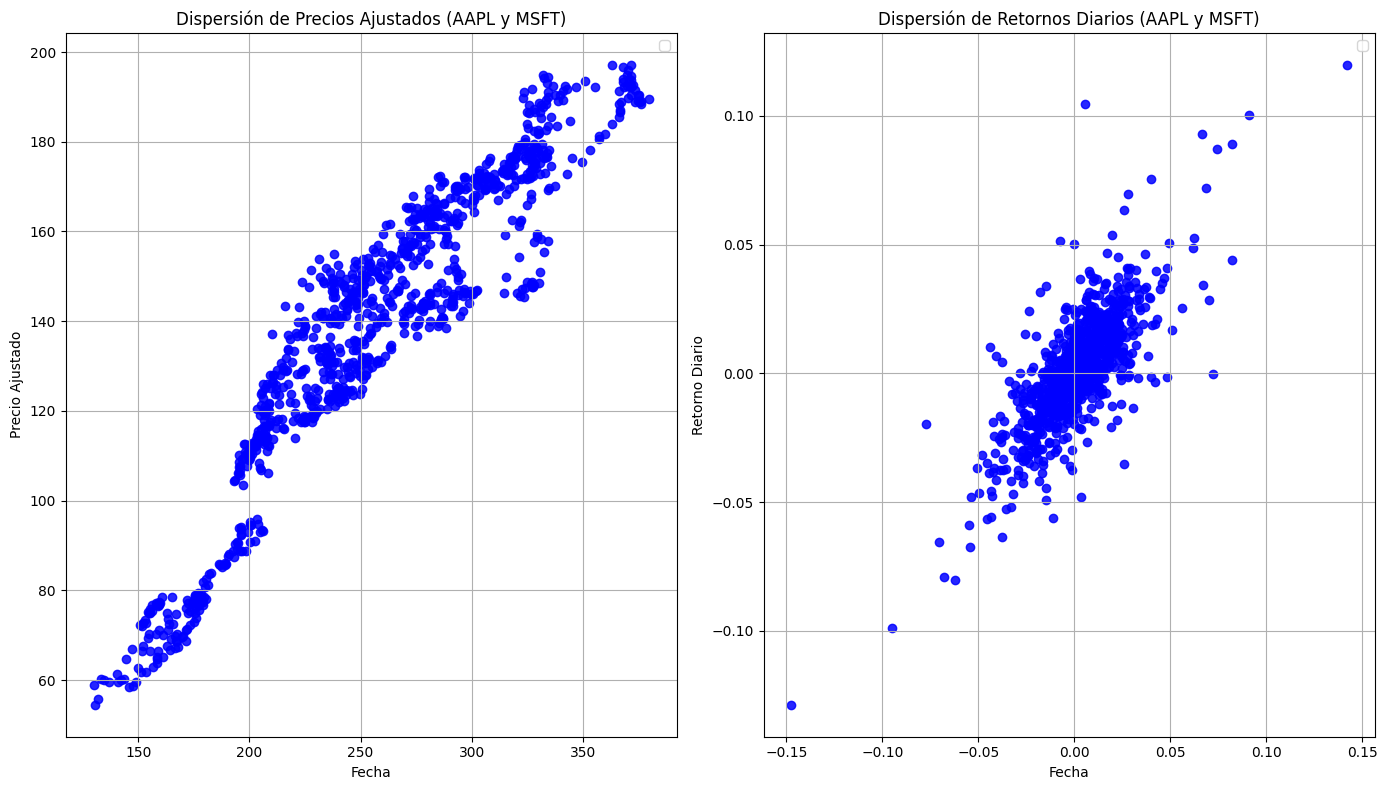

In [96]:
# Descargar los datos de AAPL y MSFT
aapl = yf.download("AAPL", start="2020-01-01", end="2024-01-01")['Adj Close']
msft = yf.download("MSFT", start="2020-01-01", end="2024-01-01")['Adj Close']

# Calcular los retornos diarios
aapl_ret = aapl.pct_change()
msft_ret = msft.pct_change()

# Crear gráficos de dispersión (scatter plots)

plt.figure(figsize=(14, 8))

# Gráfico de dispersión de los precios
plt.subplot(1, 2, 1)
plt.scatter(msft, aapl, color='blue', alpha=0.85)
plt.title('Dispersión de Precios Ajustados (AAPL y MSFT)')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.legend()
plt.grid(True)

# Gráfico de dispersión de los retornos
plt.subplot(1, 2, 2)
plt.scatter(msft_ret, aapl_ret, color='blue', alpha=0.85)
plt.title('Dispersión de Retornos Diarios (AAPL y MSFT)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()